In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import time

# Load your dataset
df = pd.read_csv('./processed_dataset_2.0.csv')  # Assuming you have a CSV file

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)'])  # Features
y = df['Literacy Rate(%)']  # Target
split_index = int(0.8 * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time
# Make predictions
y_pred = rf_model.predict(X_test)+13

# Calculate MAE, MAPE, and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y)) * 100

# Print the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_test = r2_score(y_test, y_pred)
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Duration of training: {duration} s')

Test R-squared (R2 Score): -0.00
Mean Absolute Error (MAE): 2.101622222222199
Mean Squared Error (MSE): 10.440563026666704
Mean Absolute Percentage Error (MAPE): 2.98%
Duration of training: 0.0740201473236084 s


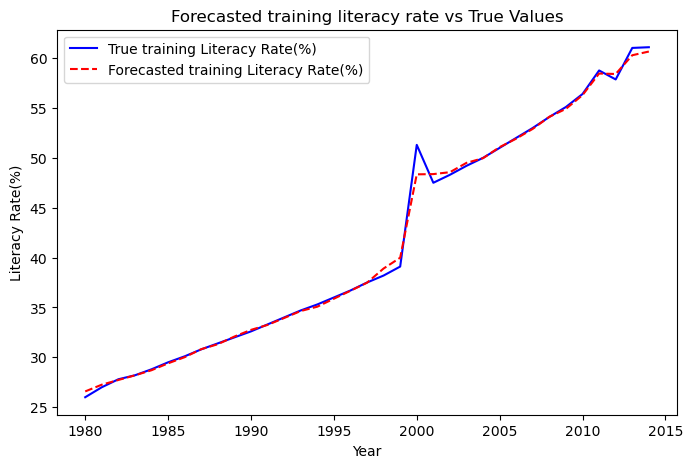

In [5]:
# Plot predictions vs true values for the test dataset
y_pred_test = rf_model.predict(X_train)
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][:split_index], y_train.values, label='True training Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred_test, label='Forecasted training Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted training literacy rate vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

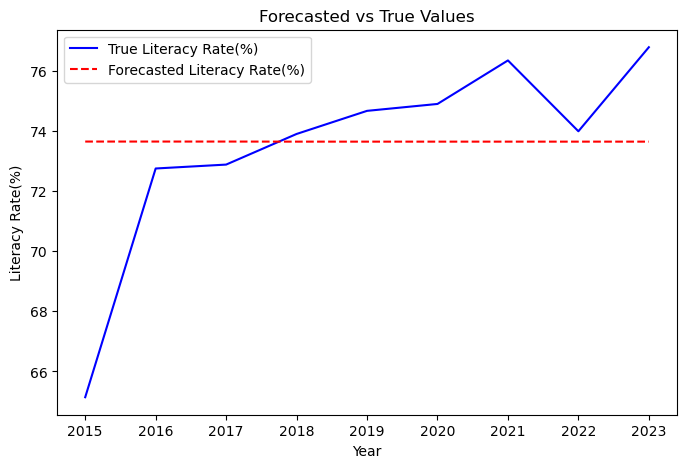

In [31]:
y_pred_test = rf_model.predict(X_test)+13

# Plot predictions vs true values for the test dataset
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][split_index:], y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()